In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [7]:
df.describe()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

## Fuel type column has a datatype object which needs to be converted to Int using get_dummies function in Pandas.

In [5]:
df = pd.get_dummies(data=df,columns= ['Fuel_Type'], dtype=int)

In [14]:
df

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,,,,,,,,,,,,
13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
8500,71,17016,86,0,1300,3,4,5,1015,0,0,1


<Axes: >

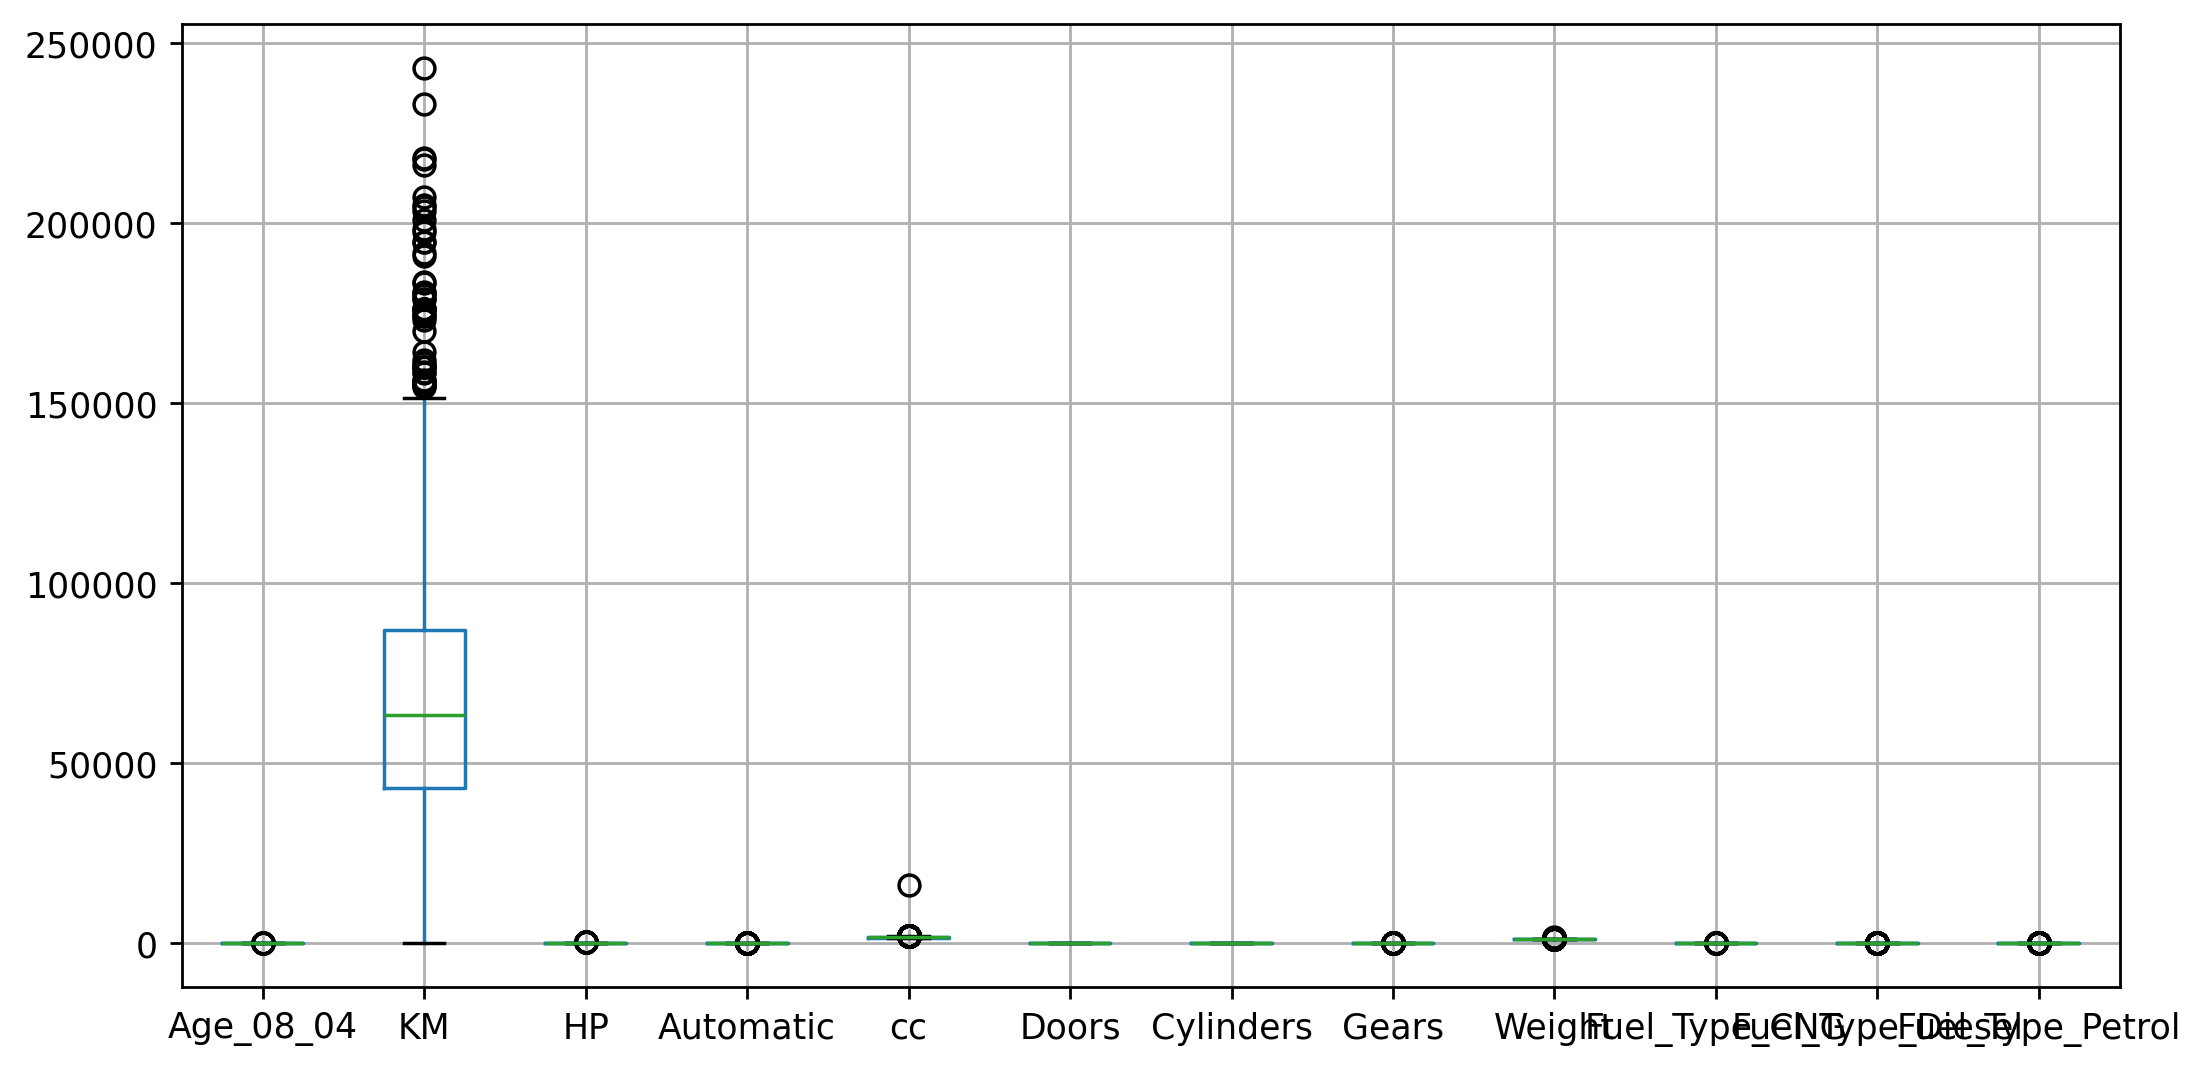

In [16]:
df.boxplot()

In [18]:
df.corr()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Age_08_04,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,0.002389,-0.097740,0.092611
KM,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,0.144016,0.403060,-0.433160
HP,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,0.062109,-0.533453,0.489110
Automatic,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,0.001486,-0.084490,0.080249
cc,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.005941,0.327723,-0.315170
Doors,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,0.009680,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,-0.049537,-0.048847,0.063182
Weight,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000,0.052756,0.568087,-0.560470
Fuel_Type_CNG,0.002389,0.144016,0.062109,0.001486,0.005941,0.009680,NaN,-0.049537,0.052756,1.000000,-0.038074,-0.296717


In [7]:
x=df.drop(columns=['Price'])
y=df['Price']

In [11]:
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [9]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [19]:
pd.DataFrame(sc.fit_transform(x), columns=x.columns)

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,-0.109454,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,-0.109454,-0.347849,0.368885
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885


In [21]:
import statsmodels.formula.api as smf

In [13]:
scaled_x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
scaled_x

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,-0.109454,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,-0.109454,-0.347849,0.368885
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885


In [15]:
scaled_x.drop(columns=['Cylinders'],inplace=True)
scaled_x

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.758561,-0.109454,2.874807,-2.710874
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,-0.140425,1.853577,-0.109454,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-0.901883,-0.109454,-0.347849,0.368885
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,-0.140425,-1.091915,-0.109454,-0.347849,0.368885


In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,y,test_size=0.2, random_state=1)

In [23]:
model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df).fit()

In [39]:
model.rsquared

0.8649083778053923

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
data = df.drop(columns=['Price','Cylinders'])

In [35]:
vif = pd.DataFrame()
vif

""


In [37]:
vif['Features'] = data.columns
vif

,Features
0,Age_08_04
1,KM
2,HP
3,Automatic
4,cc
5,Doors
6,Gears
7,Weight
8,Fuel_Type_CNG
9,Fuel_Type_Diesel


In [39]:
vif['VIF'] = [variance_inflation_factor(data,i) for i in range(len(data.columns))]

In [41]:
vif['VIF'] = [variance_inflation_factor(data,i) for i in range(len(data.columns))]

In [43]:
vif

,Features,VIF
0,Age_08_04,1.920520
1,KM,2.001790
2,HP,2.299766
3,Automatic,1.094550
4,cc,1.223892
5,Doors,1.217898
6,Gears,1.117413
7,Weight,3.297145
8,Fuel_Type_CNG,22.221198
9,Fuel_Type_Diesel,221.585039
